### Introduction
Term deposit is always a key business of a bank and a good marketing campaign plays an important role in financial selling. Nowadays, the telephone marketing, which can assist consulting institution to extract potential clients, has been one of the most general marketing campaigns. The objective of this project is to predict the result of phone calls to long term deposits. The results will be valuable to assist managers in prioritizing and selecting the next customers to be contacted during the term deposit campaigns.

### Machine learning problem
The classification approach to predict which clients are more likely to subscribe for the term deposits.

### Dataset information
Dataset is collected from UCI Machine learning Repository.

Link: https://archive.ics.uci.edu/ml/datasets/bank+marketing#

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

The dataset provides the customers' information of the bank from May 2008 to November 2010. It includes 41,188 records and 21 fields.
#### Input variables:
**Bank client data**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-
collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign**
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) - Cylical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy (Formula: ((number of employees in this quarter - number of employees in previous quarter)/average employees in the time period))

17 - cons.price.idx: consumer price index - monthly indicator (numeric) - A Consumer Price Index measures changes in the price level of a weighted average market basket of consumer goods and services purchased by households.The CPI for the current year is either more or less than 100, with the former indicating an increase in the prices of the goods and services and the latter signifying the decrease in the costs over a period.

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) - Consumer confidence index provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings.

19 - euribor3m: euribor 3 month rate - daily indicator (numeric) - The 3 month Euribor interest rate is the interest rate at which a panel of banks lend money to one another with a maturity of 3 months.



20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Exploratory data analysis

#### Data Acquiring

In [406]:
# Import neccessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [407]:
pd.set_option("display.max_columns", 30)

In [408]:
# Data acquiring
data = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


This dataset has 41,188 records and 21 fields

In [409]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,112,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [410]:
data.shape

(41188, 21)

In [411]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

Next, I will drop "duration" feature because this feature means the last contact duration (in seconds). This attribute highly affects the output target(e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [412]:
data.drop(['duration'], axis = 1, inplace = True)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


#### Splitting of data

In [413]:
from sklearn.model_selection import train_test_split

In [414]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### EDA

In [11]:
# Get some basic information about the dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28831 entries, 31880 to 2732
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  campaign        28831 non-null  int64  
 11  pdays           28831 non-null  int64  
 12  previous        28831 non-null  int64  
 13  poutcome        28831 non-null  object 
 14  emp_var_rate    28831 non-null  float64
 15  cons_price_idx  28831 non-null  float64
 16  cons_conf_idx   28831 non-null  float64
 17  euribor3m       28831 non-nu

In [12]:
# Which columns are categorical 
object_cols = [i for i in X_train.columns if X_train[i].dtype == 'O']
object_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [13]:
# Which columns are numerical
numerical_cols = [i for i in X_train.columns if X_train[i].dtype != 'O']
numerical_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [14]:
# Describe numerical columns
X_train.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,40.055322,2.570532,962.629600,0.173633,0.071139,93.572059,-40.518234,3.610646,5166.737016
std,10.422638,2.762330,186.532258,0.492356,1.574005,0.580447,4.632800,1.736874,72.283580
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- The average age of bank's customers is 40 years old. While the youngest customer is 17 years old, the oldest one is 98 years old.
- In average, each customer has 2.5 contacts with the bank during this campaign
- Most clients were not previously contacted 
- In the previous campaign, each customer has just 0.17 contacts in average.
- Mean of employment variation rate is 0.07, so the number of employees did not change much during the discussed time period
- Average price of consumer goods and services has decreased over the time period (mean of cons_price_idx is 93.57)


In [15]:
# Describe object columns
X_train.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,28831,28831,28831,28831,28831,28831,28831,28831,28831,28831
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,7262,17559,8460,22766,15125,23751,18340,9651,6107,24850


- In terms of job, the highest percentage of clients works as admin
- Regarding education, customers having university degree account for the highest proportion

In [16]:
# Get the number of missing values in each column
X_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

The train dataset does not have missing values

#### 1D analysis

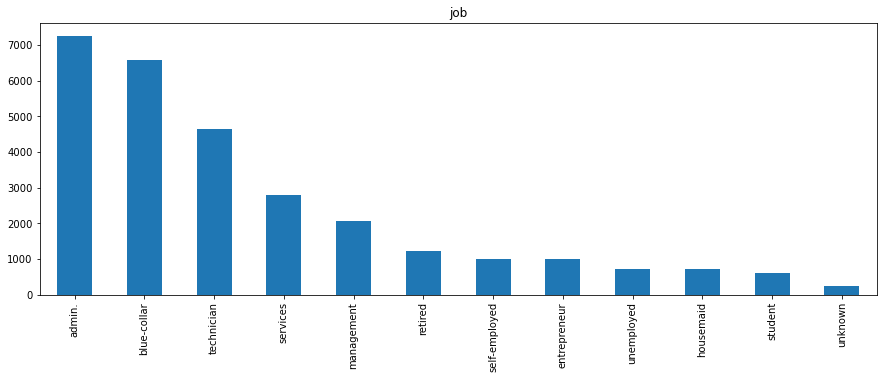

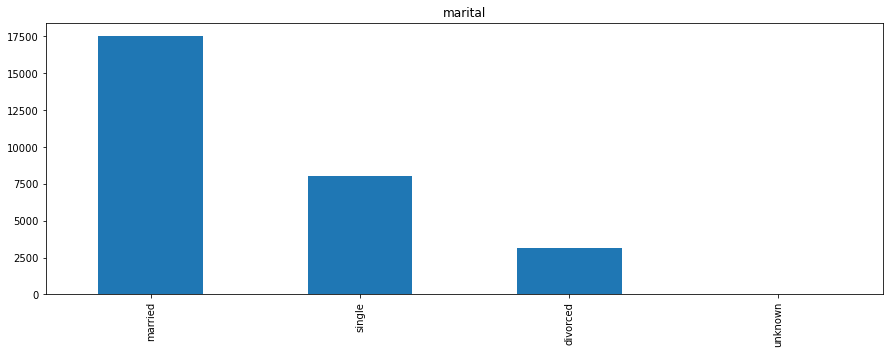

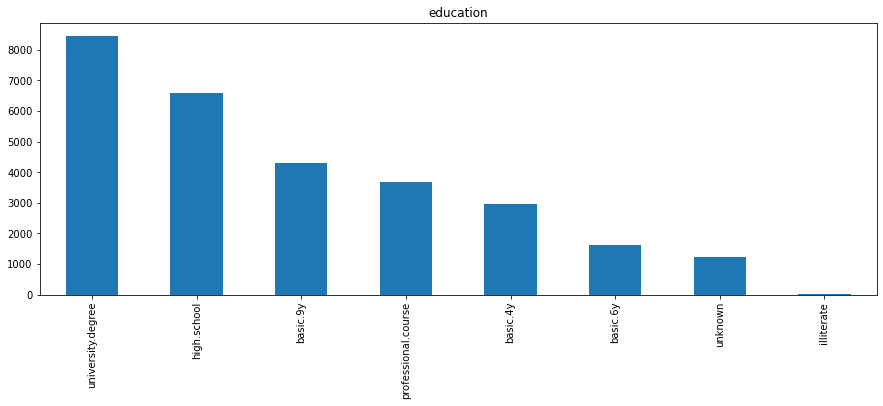

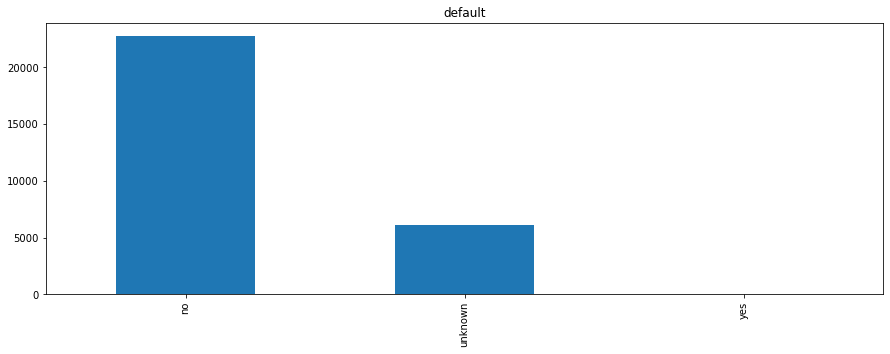

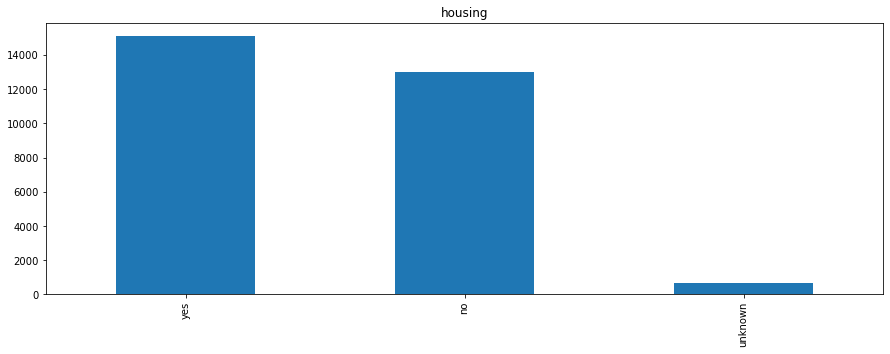

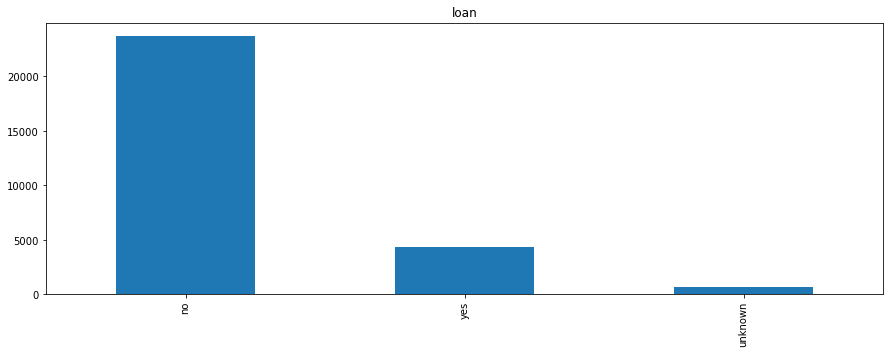

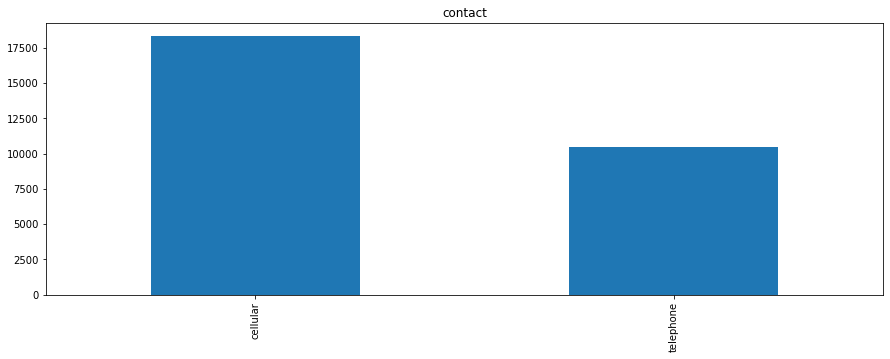

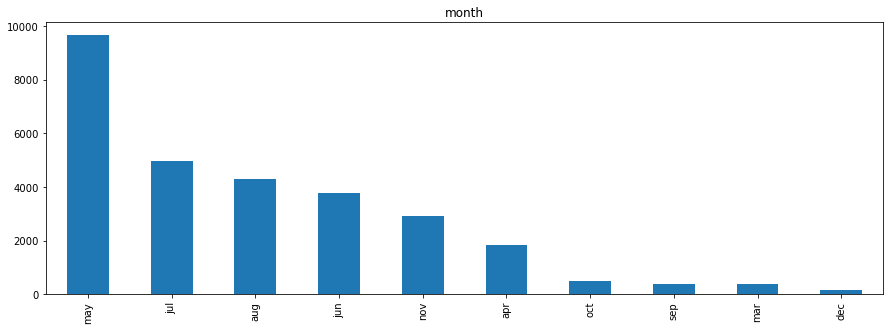

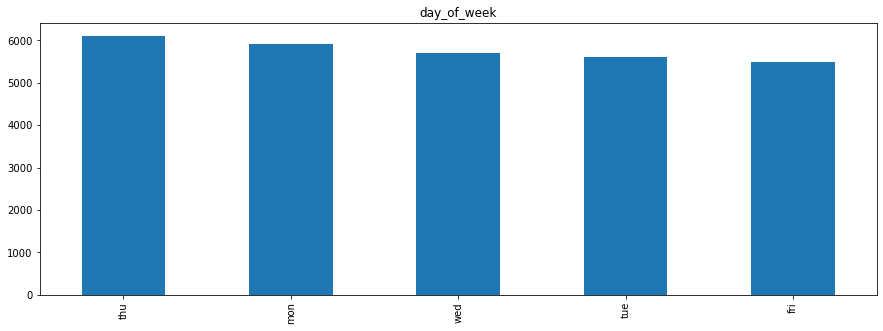

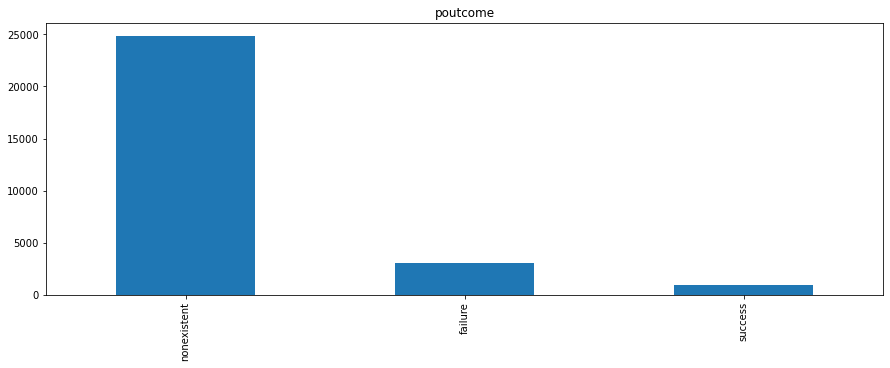

In [17]:
# Show the number of each value in each features by bar charts
for col in object_cols:
    X_train[col].value_counts().plot(kind='bar', figsize=(15,5))
    plt.title(col)
    plt.show()

**Input Categorical feature observations**
- Job:Most bank's customers have job types of Admin, blue-color and technician. It means bank targets high salaried people.
- Marital: High proportion of customers are married
- Education: more clients had university degree. Obviously, people having university degree have higher salaries
- Default: Most clients do not have credit default, it means they can be approached
- Housing: We must give more importance on clients who do not have housing loan
- Loan: We must give more importance on customers who do not have personal loan
- Month: May seems to be the busy month of the bank
- Day_of_week: everyday seems to be busy
- Contact: The number of customers which the bank had contacted through cellular were doubled those which the bank had contacted through telephone
- poutcome: the success rate of the previous campaign is small


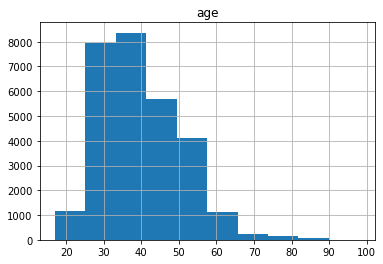

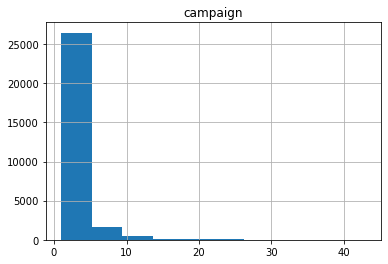

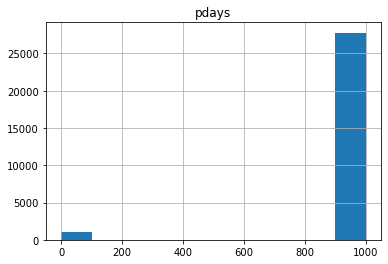

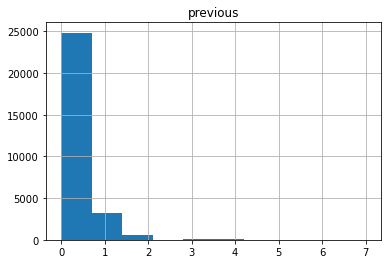

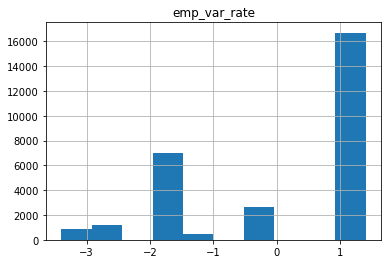

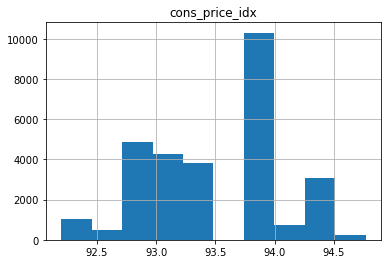

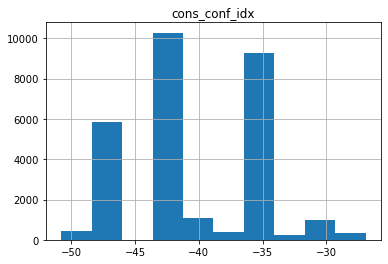

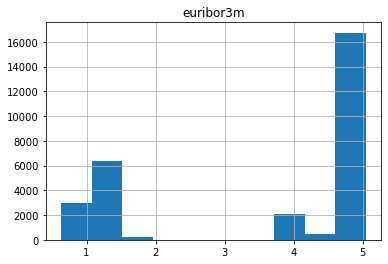

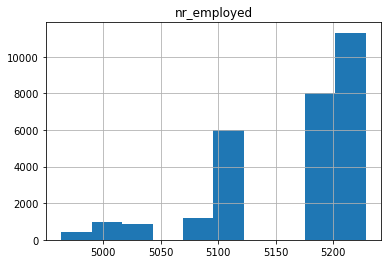

In [18]:
# Show histograms of numerical columns:
for col in numerical_cols:
    X_train[col].hist()
    plt.title(col)
    plt.show()

**Input numerical feature observations**
- Age: More clients are in 30-40 years old
- Campaign: Bank contacted to clients around 1-5 times in this campaign
- pdays: After the previous campaign, most clients were not contacted
- previous: In the previous campaign, most customers were contacted less than 1 time
- emp_var_rate: More quarters saw the increase in employment compared to the previous quarters
- cons_price_idx: The price of consumer good and services decreased
- cons_conf_idx: Consumers had the negative opinions about future developments of households' consumption and saving
- euribor3m: Banks lend money to one another with a maturity of 3 months with the interest rate of nearly 5%

### 2D analysis

In [19]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
31880,31,technician,single,university.degree,no,no,no,cellular,nov,tue,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
38177,44,admin.,married,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2459,43,management,married,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
756,35,blue-collar,married,basic.4y,no,no,no,cellular,nov,tue,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
11275,33,admin.,single,university.degree,no,yes,yes,cellular,may,thu,2,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,57,blue-collar,married,basic.4y,no,yes,yes,telephone,may,tue,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
32103,36,blue-collar,single,basic.9y,no,no,yes,telephone,may,thu,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
30403,31,technician,married,professional.course,no,no,no,telephone,jun,wed,2,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,1
21243,29,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


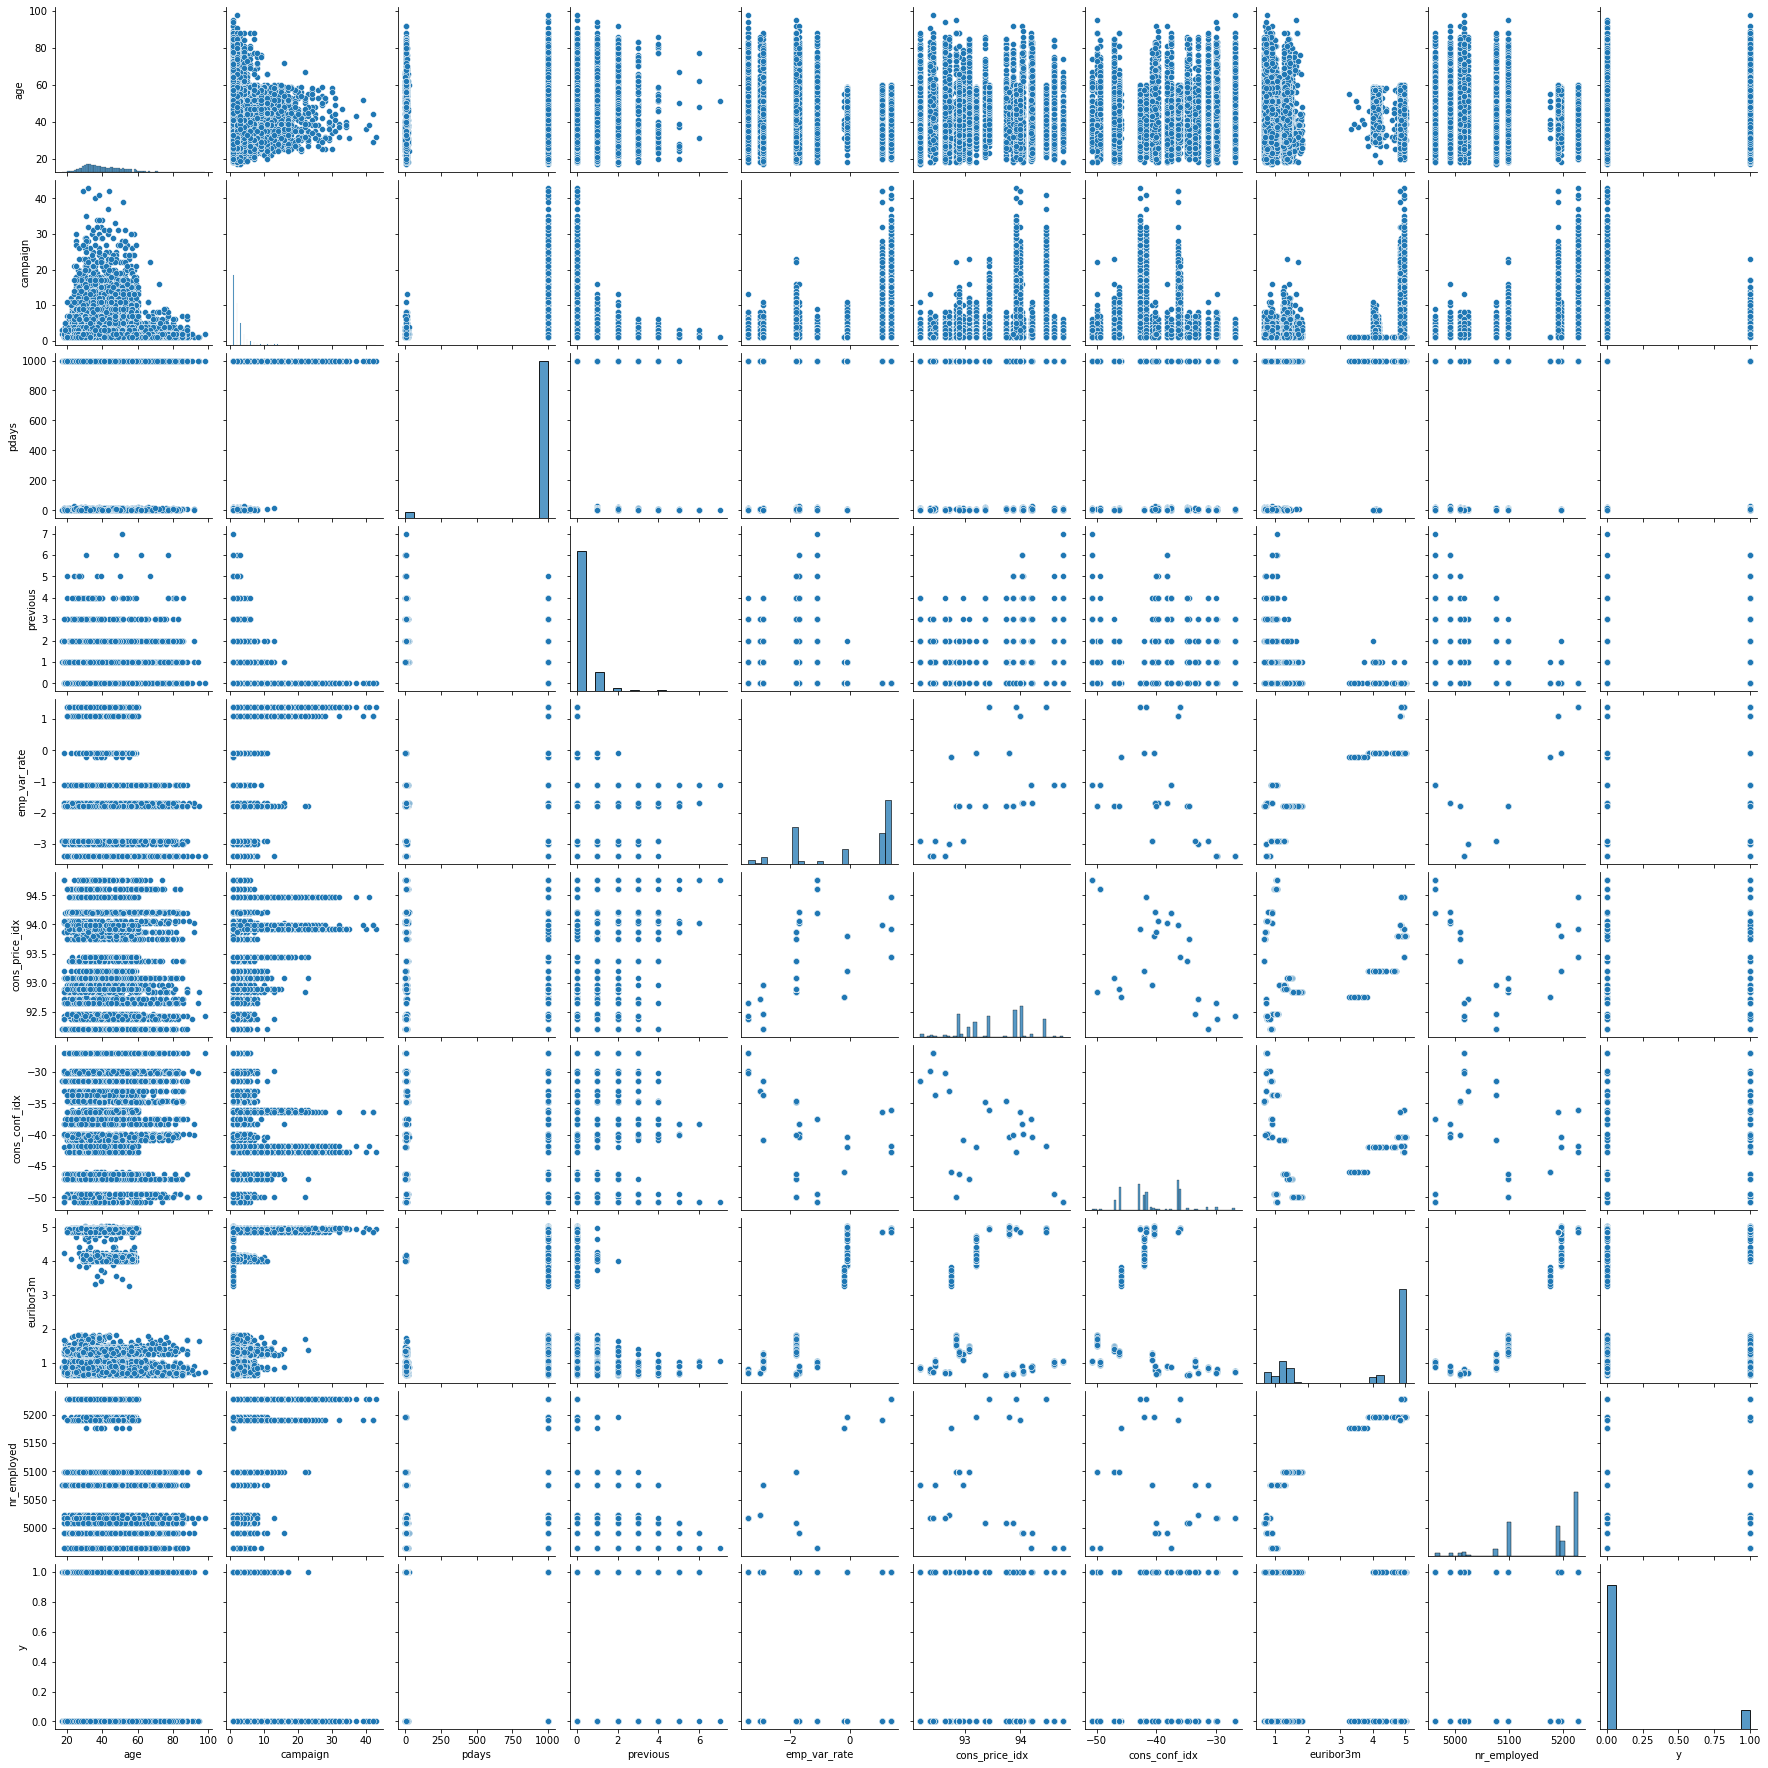

In [20]:
sns.pairplot(train_data)

In the pairplot, we can see the correlation between 'campaign' feature and outcome variables that when the values of campaign, which is the number of contact to customers during the campaign, are more than 20, the customers are more likely not to subscribe the term deposit.

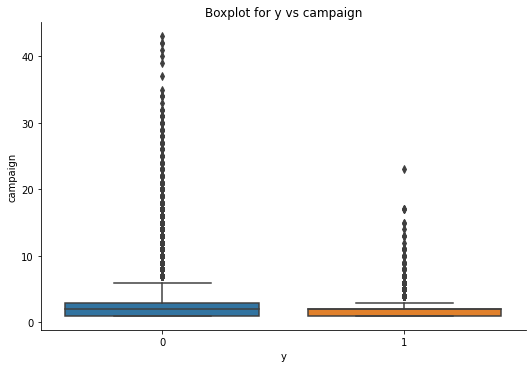

In [21]:
sns.catplot(x="y", y="campaign", data=train_data, kind="box", aspect=1.5)
plt.title("Boxplot for y vs campaign")
plt.show()

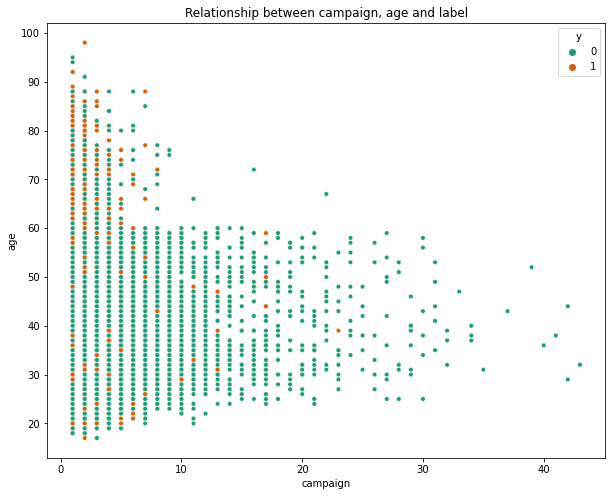

In [22]:
# Scatter plots of campaign and age according to outcome variable(0/1)
plt.figure(figsize=(10,8))
sns.scatterplot(x="campaign", y="age", hue="y", data=train_data, palette="Dark2", s=20)
plt.title("Relationship between campaign, age and label")
plt.show()

- We can see that the bank just needed to contact to elderly people (>60 years old) or younf people (<30 years old) around fewer than 8-10 times, these people would purchase the term deposit. So bank did not need to contact them anymore
- Few people in their 30s to 50s years old subscribe the term deposit. When the customers were not willing to purchase the term deposit, bank had to contact them a lot of time (>20 times)

<ipython-input-23-14c46d0421cb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train_data.corr(method = 'pearson')


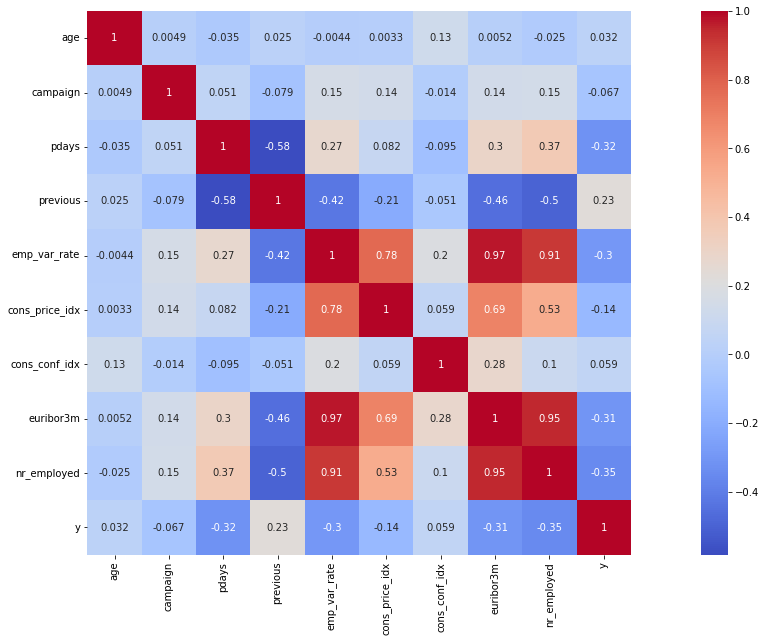

In [23]:
#Show correlations between features by using Heat map method

correlations = train_data.corr(method = 'pearson')
plt.figure(figsize = (25,10))
sns.heatmap(correlations, vmax = 1, square = True, annot= True, cmap='coolwarm')
plt.show()

- I observed the strong positive relationship between euribor3m and emp.var.rate with correlation of 97%.
- Also the same emp.var.rate attribute has a strong positive correlation with nr_employed at 0.91 and cons_price_idx at 0.78
- euribor3m and nr_employed features have a strong positive correlation (0.95)

In [24]:
# sns.countplot(x = 'y', data = data)
# plt.show()


In [25]:
# count_no_sub = len(data[data['y'] == 0])
# count_sub = len(data[data['y'] == 1])
# pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
# pct_of_sub = count_sub/(count_no_sub+count_sub)
# print('percentage of no subscription is', pct_of_no_sub*100)
# print('percentageof subscription is', pct_of_sub*100)

### More exploration of the average of continuous features according to each value of categorical features

In [26]:
data.groupby('y').mean()

<ipython-input-26-1c0ce2b04705>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('y').mean()


,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
0,39.911185,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [27]:
data.groupby('job').mean()

<ipython-input-27-91ec6f027066>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('job').mean()


,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,
admin.,38.187296,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [28]:
data.groupby('marital').mean()

<ipython-input-28-91bb8e81df13>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('marital').mean()


,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
divorced,44.899393,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [29]:
data.groupby('education').mean()

<ipython-input-29-4c375781e437>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('education').mean()


,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic.4y,47.596504,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [30]:
job_crosstab = pd.crosstab(train_data['job'], train_data['y'], margins = True, margins_name = "Total")
job_crosstab


y,0,1,Total
job,,,
admin.,6307,955,7262
blue-collar,6117,457,6574
entrepreneur,918,82,1000
housemaid,651,66,717
management,1829,238,2067
retired,897,314,1211
self-employed,901,105,1006
services,2547,237,2784
student,398,197,595


In [31]:
job_crosstab[0] = job_crosstab[0]/job_crosstab[0]['Total']
job_crosstab[1] = job_crosstab[1]/job_crosstab[1]['Total']

In [32]:
job_crosstab

y,0,1,Total
job,,,
admin.,0.246685,0.292586,7262
blue-collar,0.239254,0.140012,6574
entrepreneur,0.035906,0.025123,1000
housemaid,0.025463,0.020221,717
management,0.071538,0.072917,2067
retired,0.035084,0.096201,1211
self-employed,0.035241,0.032169,1006
services,0.099621,0.072610,2784
student,0.015567,0.060355,595


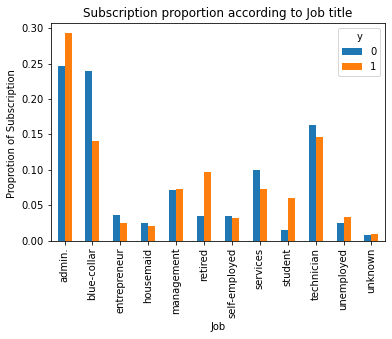

In [33]:
job_crosstab.drop(['Total'], axis=1).drop(['Total'], axis=0).plot(kind = 'bar')
plt.title('Subscription proportion according to Job title')
plt.xlabel('Job')
plt.ylabel('Proprotion of Subscription ')
plt.show()

The frequency of subscription of the deposit depends much on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [34]:
marital_crosstab = pd.crosstab(data['marital'], data['y'])
marital_crosstab

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


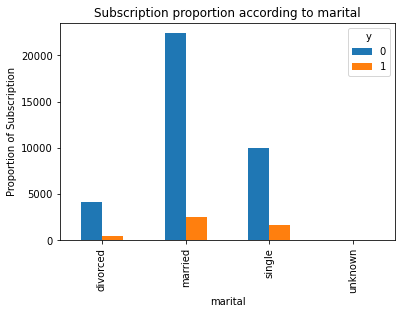

In [35]:
marital_crosstab.plot(kind = 'bar')
plt.xlabel('marital')
plt.ylabel('Proportion of Subscription')
plt.title('Subscription proportion according to marital')
plt.show()

Marial status of customers seems not to affect the frequency of purchase of the deposit. Therefore, marial feature is not a good predictor for the outcome variable.

In [36]:
education_crosstab = pd.crosstab(data['education'], data['y'])
education_crosstab_pct = education_crosstab.div(education_crosstab.sum(1), axis = 0)
education_crosstab_pct

y,0,1
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


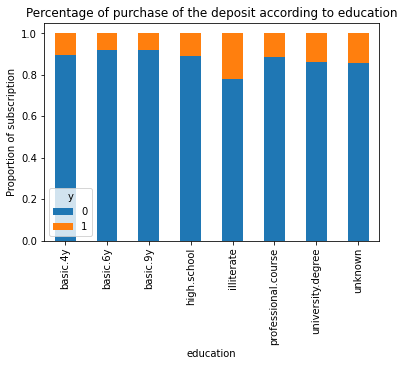

In [37]:
education_crosstab_pct.plot(kind = 'bar', stacked = True)
plt.xlabel('education')
plt.ylabel('Proportion of subscription')
plt.title('Percentage of purchase of the deposit according to education')
plt.show()


Education feature is a good predictor for the frequency of deposit subscription

In [38]:
month_crosstab = pd.crosstab(data['month'], data['y'])
month_crosstab_pct = month_crosstab.div(month_crosstab.sum(1), axis = 0)
month_crosstab_pct

y,0,1
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719


<AxesSubplot: xlabel='month'>

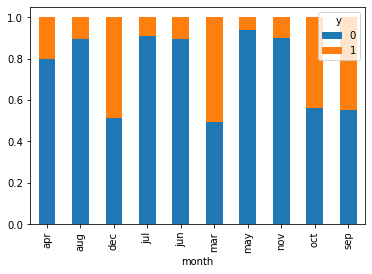

In [39]:
month_crosstab_pct.plot(kind = 'bar', stacked = True)

Month feature may be a good predictor for the outcome variable

In [40]:
day_of_week_crosstab = pd.crosstab(data['day_of_week'], data['y'])
day_of_week_crosstab_pct = day_of_week_crosstab.div(day_of_week_crosstab.sum(1), axis = 0)
day_of_week_crosstab_pct

y,0,1
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


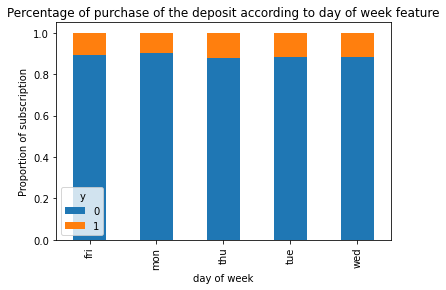

In [41]:
day_of_week_crosstab_pct.plot(kind = 'bar', stacked = True)
plt.xlabel('day of week')
plt.ylabel('Proportion of subscription')
plt.title('Percentage of purchase of the deposit according to day of week feature')
plt.show()

Day of week feature doesn't seem to be a good predictor for the outcome variable

In [42]:
poutcome_crosstab = pd.crosstab(data['poutcome'], data['y'])
poutcome_crosstab_pct = poutcome_crosstab.div(poutcome_crosstab.sum(1), axis = 0)
poutcome_crosstab_pct

y,0,1
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


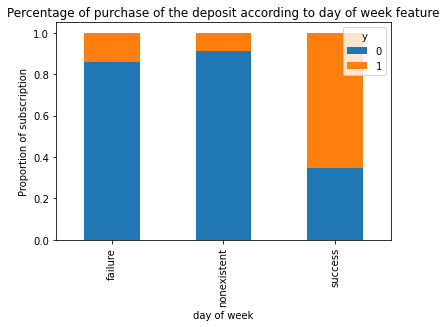

In [43]:
poutcome_crosstab_pct.plot(kind = 'bar', stacked = True)
plt.xlabel('day of week')
plt.ylabel('Proportion of subscription')
plt.title('Percentage of purchase of the deposit according to day of week feature')
plt.show()

poutcome seems to be a good predictor of the outcome variable

In [44]:
# import sweetviz as sv


# my_report = sv.analyze(train_data)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [45]:
# my_report = sv.analyze(train_data, target_feat="y")
# my_report.show_html() #

In [46]:
# my_report = sv.compare_intra(train_data, train_data["y"] == 1, ["1", "0"])
# my_report.show_html() #

### One hot encoding

In [47]:
for var in object_cols:    
    just_dummies = pd.get_dummies(X_train[var], prefix = var)
    X_train_1 = pd.concat([X_train, just_dummies], axis = 1)
    X_train = X_train_1
X_train_dummies = pd.DataFrame(X_train)
X_train_dummies

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
31880,31,technician,single,university.degree,no,no,no,cellular,nov,tue,1,999,1,failure,-0.1,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
38177,44,admin.,married,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2459,43,management,married,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
756,35,blue-collar,married,basic.4y,no,no,no,cellular,nov,tue,2,999,0,nonexistent,-0.1,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
11275,33,admin.,single,university.degree,no,yes,yes,cellular,may,thu,2,999,1,failure,-1.8,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,57,blue-collar,married,basic.4y,no,yes,yes,telephone,may,tue,7,999,0,nonexistent,1.1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
32103,36,blue-collar,single,basic.9y,no,no,yes,telephone,may,thu,3,999,0,nonexistent,1.1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
30403,31,technician,married,professional.course,no,no,no,telephone,jun,wed,2,999,0,nonexistent,1.4,...,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
21243,29,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,2,999,0,nonexistent,-1.8,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [48]:
list_colname = X_train_dummies.columns.tolist()
list_colname

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'mon

In [49]:
keep_col = [i for i in list_colname if i not in object_cols]
keep_col

['age',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [50]:
X_train = X_train_dummies[keep_col]
X_train

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
31880,31,1,999,1,-0.1,93.200,-42.0,4.153,5195.8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
38177,44,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2459,43,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
756,35,2,999,0,-0.1,93.200,-42.0,4.153,5195.8,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
11275,33,2,999,1,-1.8,92.893,-46.2,1.266,5099.1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,57,7,999,0,1.1,93.994,-36.4,4.856,5191.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
32103,36,3,999,0,1.1,93.994,-36.4,4.860,5191.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
30403,31,2,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
21243,29,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


### Oversampling using SMOTE 

In [51]:
count_no_sub = len(y_train[y_train['y'] == 0])
count_sub = len(y_train[y_train['y'] == 1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print('percentage of no subscription is', pct_of_no_sub*100)
print('percentageof subscription is', pct_of_sub*100)

percentage of no subscription is 88.67885262391177
percentageof subscription is 11.321147376088238


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11.We will do oversampling by using SMOTE method

In [52]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0,k_neighbors = 5)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['y'])
print(os_data_X)
print(os_data_y)

       age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       31         1    999         1          -0.1       93.200000   
1       44         1    999         0           1.1       93.994000   
2       43         1    999         0           1.1       93.994000   
3       35         2    999         0          -0.1       93.200000   
4       33         2    999         1          -1.8       92.893000   
...    ...       ...    ...       ...           ...             ...   
51129   44         1    999         0          -3.4       92.379000   
51130   79         1    999         0          -1.8       92.844648   
51131   26         1      6         1          -1.8       93.437033   
51132   40         2    999         0           1.4       94.465000   
51133   71         1    999         0          -3.4       92.431000   

       cons_conf_idx  euribor3m  nr_employed  job_admin.  job_blue-collar  \
0         -42.000000   4.153000       5195.8           0              

In [53]:
# Check the number of our data
print("length of oversampled data is", len(os_data_X))
print("Number of no subscription in oversampled data", len(os_data_y[os_data_y['y']==1]))
print("Number of subscription in oversampled data", len(os_data_y[os_data_y['y'] == 1]))
print("Proportion of no subscription data in oversampled data is", 
     len(os_data_y[os_data_y['y']==0])/len(os_data_y))
print("Proportion of subscription data in oversampled data is", 
     len(os_data_y[os_data_y['y']==1])/len(os_data_y))

length of oversampled data is 51134
Number of no subscription in oversampled data 25567
Number of subscription in oversampled data 25567
Proportion of no subscription data in oversampled data is 0.5
Proportion of subscription data in oversampled data is 0.5


### Logistic Regression Model Fitting

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=2023)
model.fit(X_train, y_train)

print("coefficients:", model.coef_)
print("intercept:", model.intercept_)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coefficients: [[ 3.94764317e-03 -7.46064285e-02 -1.56155296e-03  1.25269752e-02
  -2.00374025e-01  1.55672047e-01  3.49362325e-02 -2.13345439e-01
  -2.57261109e-03  9.31827716e-03 -1.55114732e-02 -1.68114027e-03
  -1.36947578e-03  7.33629929e-06  7.98331413e-03 -9.85918391e-05
  -3.53750967e-03  7.49275872e-03 -1.82110621e-03  1.25933869e-03
  -8.27125669e-06 -2.05837414e-03 -1.33270221e-02  1.72812683e-02
   1.37584658e-04 -3.58416324e-03 -2.72834980e-03 -8.02468907e-03
   1.60381088e-03  1.61761597e-04  4.04165333e-05  1.24635682e-02
   2.10110169e-03  2.32506854e-02 -2.12104225e-02 -6.80618422e-06
   1.17920226e-04 -7.16218399e-05  1.98715838e-03  2.50614779e-03
  -7.16218399e-05 -4.01069186e-04  3.33332740e-02 -3.12998172e-02
   1.06794008e-02 -1.78042530e-03  1.81574349e-03 -7.97530680e-04
   1.91905099e-03  9.10913585e-03 -3.06698879e-02 -2.98917438e-03
   8.12749139e-03  6.61965248e-03 -6.57433771e-04 -5.97826076e-03
   4.12107358e-03  8.96560771e-04  3.65151693e-03  4.04681444e

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
X_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [56]:
for var in object_cols:    
    just_dummies = pd.get_dummies(X_test[var], prefix = var)
    X_test_1 = pd.concat([X_test, just_dummies], axis = 1)
    X_test = X_test_1
X_test_dummies = pd.DataFrame(X_test)
X_test_dummies

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
15500,51,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,4,999,0,nonexistent,-1.8,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
29034,31,technician,married,professional.course,no,no,no,cellular,apr,mon,3,999,1,failure,-1.8,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
11199,33,blue-collar,single,basic.9y,no,no,no,telephone,jul,tue,2,999,0,nonexistent,1.4,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
22247,29,admin.,married,high.school,no,no,no,telephone,jun,mon,1,999,0,nonexistent,1.4,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
27180,57,housemaid,married,basic.4y,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,31,services,divorced,high.school,no,no,no,telephone,jul,wed,2,999,0,nonexistent,1.4,...,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
15744,31,technician,married,university.degree,no,yes,yes,cellular,may,thu,2,999,1,failure,-1.8,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
34965,31,entrepreneur,married,high.school,no,yes,no,telephone,jun,thu,2,999,0,nonexistent,1.4,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4644,53,entrepreneur,married,basic.9y,no,yes,no,cellular,nov,tue,2,999,1,failure,-0.1,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [57]:
list_colname = X_test_dummies.columns.tolist()
keep_col = [i for i in list_colname if i not in object_cols]
X_test = X_test_dummies[keep_col]
X_test

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
15500,51,4,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
29034,31,3,999,1,-1.8,93.075,-47.1,1.466,5099.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
11199,33,2,999,0,1.4,93.918,-42.7,4.962,5228.1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
22247,29,1,999,0,1.4,94.465,-41.8,4.961,5228.1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
27180,57,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,31,2,999,0,1.4,93.918,-42.7,4.963,5228.1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
15744,31,2,999,1,-1.8,92.893,-46.2,1.266,5099.1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
34965,31,2,999,0,1.4,94.465,-41.8,4.958,5228.1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4644,53,2,999,1,-0.1,93.200,-42.0,4.153,5195.8,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [58]:
from collections import Counter
y_pred = model.predict(X_test)
Counter(y_pred)

Counter({0: 11972, 1: 385})

In [59]:
11972/385


31.096103896103894

In [60]:
y_prob = model.predict_proba(X_test)[:,1]
y_prob

array([0.13656885, 0.13938131, 0.0372046 , ..., 0.04136027, 0.06680315,
       0.05855145])

<AxesSubplot: ylabel='Count'>

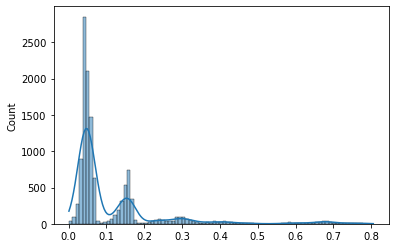

In [61]:
sns.histplot(y_prob, kde = True)

In [62]:
# Calculate using binary cross entropy loss
from sklearn.metrics import log_loss

log_loss(y_test, y_prob)

0.28458863555785674

In [63]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.8765394832493306

### Decision tree

In [64]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth =7)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7)

In [65]:
from collections import Counter
y_pred = model.predict(X_test)
Counter(y_pred)

Counter({0: 11722, 1: 635})

In [66]:
y_prob = model.predict_proba(X_test)[:,1]
y_prob

array([0.07336343, 0.07336343, 0.04397673, ..., 0.04397673, 0.05842736,
       0.04397673])

<AxesSubplot: ylabel='Count'>

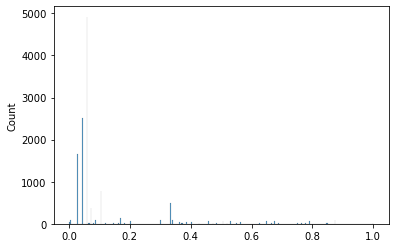

In [67]:
sns.histplot(y_prob)

In [68]:
# Calculate using binary cross entropy loss
from sklearn.metrics import log_loss

log_loss(y_test, y_prob)

0.3490655983230697

In [69]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.8862989014632375

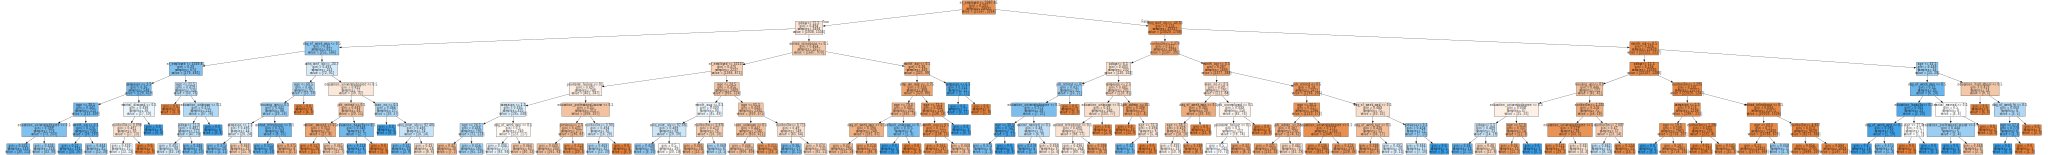

In [70]:
from sklearn.tree import export_graphviz
import graphviz


dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier


# Initialize the classifier
clf = RandomForestClassifier(n_jobs=-1, n_estimators=2000, random_state=2023, max_depth=7,max_features=int(0.5*len(keep_col)), max_samples=0.6)

# Fit the classifier to the data
clf.fit(X_train, y_train)

# Make predictions on new data
y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average="weighted")

<ipython-input-84-15dc61e1318f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.8851848738406192

### XG Boost

In [88]:
import xgboost as xgb
# Initialize the classifier
clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=2000, random_state=0, learning_rate = 0.01)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average="weighted")

0.8828536817065649

### Light GBM

Documents: https://lightgbm.readthedocs.io/en/latest/Parameters.html

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [474]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
31880,31,technician,single,university.degree,no,no,no,cellular,nov,tue,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8
38177,44,admin.,married,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2459,43,management,married,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
756,35,blue-collar,married,basic.4y,no,no,no,cellular,nov,tue,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8
11275,33,admin.,single,university.degree,no,yes,yes,cellular,may,thu,2,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1


In [475]:
## Using label encoder to preprocess categorical columns for LightGBM model

from sklearn import preprocessing

cate_cols = []
for c in X_train.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        le = preprocessing.LabelEncoder()
        X_train[c] = le.fit_transform(X_train[c])
        X_test[c] = le.fit_transform(X_test[c])
        cate_cols.append(c)
        
#         X_train[c] = X_train[c].astype('category')
#         X_test[c] = X_test[c].astype('category')

In [476]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
31880,31,9,2,6,0,0,0,0,7,3,1,999,1,0,-0.1,93.200,-42.0,4.153,5195.8
38177,44,0,1,5,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2459,43,4,1,5,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
756,35,1,1,0,0,0,0,0,7,3,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8
11275,33,0,2,6,0,2,2,0,6,2,2,999,1,0,-1.8,92.893,-46.2,1.266,5099.1


In [477]:
cate_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [490]:
import lightgbm as lgb

# Create the dataset for LightGBM
lgb_train = lgb.Dataset(X_train, y_train)




# Define the hyperparameters for the model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'max_depth': -1,
    'learning_rate': 0.01,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'verbose':0,
    'scale_pos_weight': 2
    
}

# Train the model
model = lgb.train(params, lgb_train, num_boost_round=200,   valid_sets=lgb_train )

## In case we have a separate val set, we can use early_stoping
# model = lgb.train(params, lgb_train, num_boost_round=1000,
#                   valid_sets=lgb_eval, 
#                   early_stopping_rounds=100, 
#                  categorical_feature = cate_cols
#                  )




# Make predictions on the test data
y_pred = model.predict(X_test)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	training's binary_logloss: 0.350394
[2]	training's binary_logloss: 0.347855
[3]	training's binary_logloss: 0.345353
[4]	training's binary_logloss: 0.34306
[5]	training's binary_logloss: 0.340853
[6]	training's binary_logloss: 0.338711
[7]	training's binary_logloss: 0.336701
[8]	training's binary_logloss: 0.334836
[9]	training's binary_logloss: 0.333021
[10]	training's binary_logloss: 0.331347
[11]	training's binary_logloss: 0.329756
[12]	training's binary_logloss: 0.328215
[13]	training's binary_logloss: 0.326726
[14]	training's binary_logloss: 0.325288
[15]	training's binary_logloss: 0.323935
[16]	training's binary_logloss: 0.322565
[17]	training's binary_logloss: 0.321331
[18]	training's binary_logloss: 0.320153
[19]	training's binary_logloss: 0.318988
[2

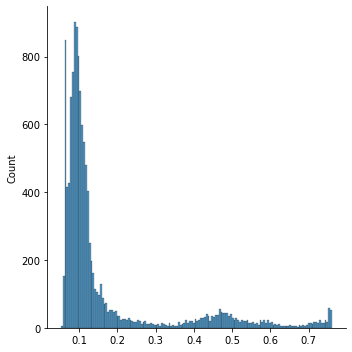

In [491]:
sns.displot(y_pred)


In [492]:
thres = 0.5
y_pred_label = y_pred >  thres
f1_score(y_test, y_pred_label, average="weighted")

0.8902499196882896

### Explain model with SHAP

In [481]:
import shap
shap.initjs()

In [482]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


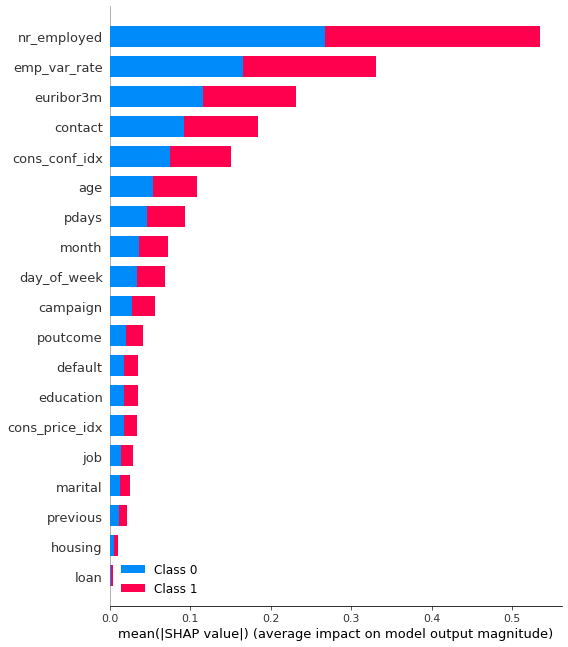

In [441]:
## Plot feature importance
shap.summary_plot(shap_values, X_train)


In [454]:
## Explain 1 observation
# For this data point, marital, contact, and age push the prediction to class 1,
# While other features like euribor3m, nr_employed push towards class 0
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train.iloc[0,:])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


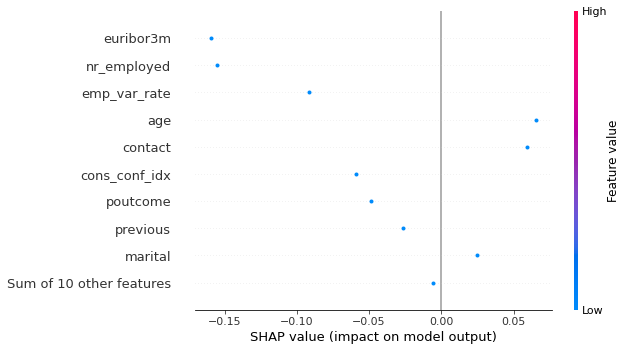

In [470]:
# The plot above can also be represented in different format with beeswarm plot:
shap.plots.beeswarm(shap_values_[0:1,:])

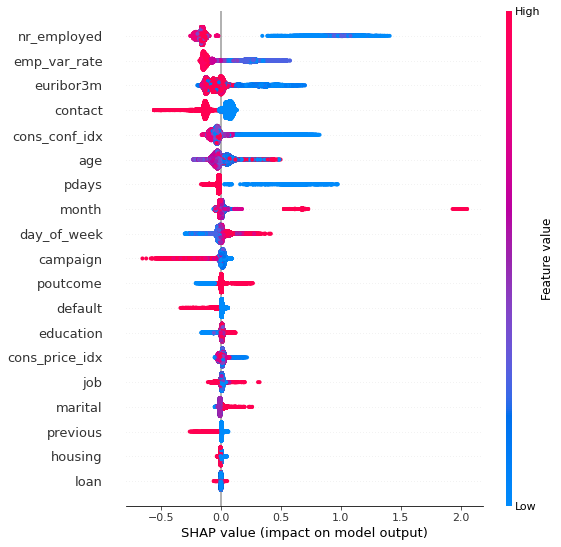

In [472]:
## We can stack all the beeswarm plots of all data points, to have an overview picture:
explainer_ = shap.Explainer(model, X_train)
shap_values_ = explainer(X_train)[:,:,1]

shap.plots.beeswarm(shap_values_,max_display=20 )